In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

# Importing the dataset
df = pd.read_csv('./Resources/Survey_India_Sample.csv')

# Reading the dataset
df.head(10)

,Disease,State,Year,Sex,Count,Population,Rate
0,Acute Encephalitis Syndrome,Chandigarh,2001,Total,571,34514777,1.654
1,Acute Encephalitis Syndrome,Chandigarh,2001,Female,176,17340743,1.015
2,Acute Encephalitis Syndrome,Chandigarh,2001,Male,365,17174034,2.125
3,Acute Encephalitis Syndrome,Chandigarh,2002,Total,442,34940334,1.265
4,Acute Encephalitis Syndrome,Chandigarh,2002,Female,145,17555714,0.826
5,Acute Encephalitis Syndrome,Chandigarh,2002,Male,279,17384620,1.605
6,Acute Encephalitis Syndrome,Chandigarh,2003,Total,403,35390986,1.139
7,Acute Encephalitis Syndrome,Chandigarh,2003,Female,127,17783924,0.714
8,Acute Encephalitis Syndrome,Chandigarh,2003,Male,261,17607062,1.482
9,Acute Encephalitis Syndrome,Chandigarh,2004,Total,359,35754827,1.004


In [2]:
""" Question 1: What is the current Infectious Disease trend across the year?
    
Let us first generalize to get each Disease count per year across the locations
    
"""

disease_list = df.Disease.unique()

disease_data = {}

for idx,val in enumerate(disease_list):
    temp = pd.DataFrame(df.query("Disease == @val and Sex == 'Total'")).groupby(['Year'])['Count'].sum()
    disease_data[val] = temp

disease_data = pd.DataFrame(disease_data) # Converting dictionary to dataframe
disease_data

,Acute Encephalitis Syndrome,Kala Azar,Viral Encephalitis,Cholera,Castor Seed Poisoning,Acute Flaccid Paralysis,Chandipura Viral Encephalitis,Brucellosis,Measles,Acute Diarrheal Disease,...,Chikungunya,Toxic Shock Syndrome (Non-Streptococcal),Influenza A (h1n1),Trichinosis,Tularemia,Mushroom Poisoning,Maharashtramia,Varicella Hospitalizations,Typhus Fever,Kyasanur Forest Disease
Year,,,,,,,,,,,,,,,,,,,,,
2001,1142,2,0,5932,0,8,40,72,11300,203180,...,6658,48,152,24,0,166,0,NaN,26,162
2002,884,0,0,4934,0,0,46,58,11372,221518,...,6344,28,104,0,2,172,0,NaN,30,134
2003,806,0,0,4376,0,4,42,38,10460,232770,...,6436,14,148,4,4,160,0,NaN,36,156
2004,718,4,0,4448,0,10,36,52,10176,246878,...,5984,8,292,2,4,140,0,NaN,22,178
2005,730,8,6,4768,0,6,54,58,9478,258354,...,5800,12,198,8,8,110,0,NaN,20,220
2006,754,4,2,4630,0,12,76,68,9274,272962,...,5552,6,352,8,8,146,0,NaN,40,146
2007,866,2,12,4560,0,4,38,56,10380,286028,...,5450,8,190,0,2,150,0,NaN,50,194
2008,872,0,2,3908,0,6,36,38,10956,298510,...,5398,18,220,70,4,158,0,NaN,28,168
2009,796,6,4,3586,0,6,36,46,11792,295210,...,4934,44,276,6,4,178,0,NaN,52,174


In [3]:
""" Let us first find out the total disease count in our dataset

This is done so that we can use the top disease data for analysis/visualizing

"""

disease_total_count = {}

for col in disease_data.columns:
    disease_total_count[col] = disease_data[col].sum()

# Converting dictionary to dataframe
disease_total_count = pd.DataFrame(list(disease_total_count.items()), columns=['Disease', 'Total Count']).sort_values(by=['Total Count'], ascending=False)


disease_total_count.set_index('Disease', inplace=True) # Changing index to Disease column
disease_total_count

,Total Count
Disease,
Acute Diarrheal Disease,3980444.0
Food Poisoning,848388.0
Measles,169672.0
Dengue,138387.0
Chickenpox,129286.0
Viral Fever,103446.0
Malaria,81198.0
Viral Hepatitis,75996.0
Chikungunya,74832.0


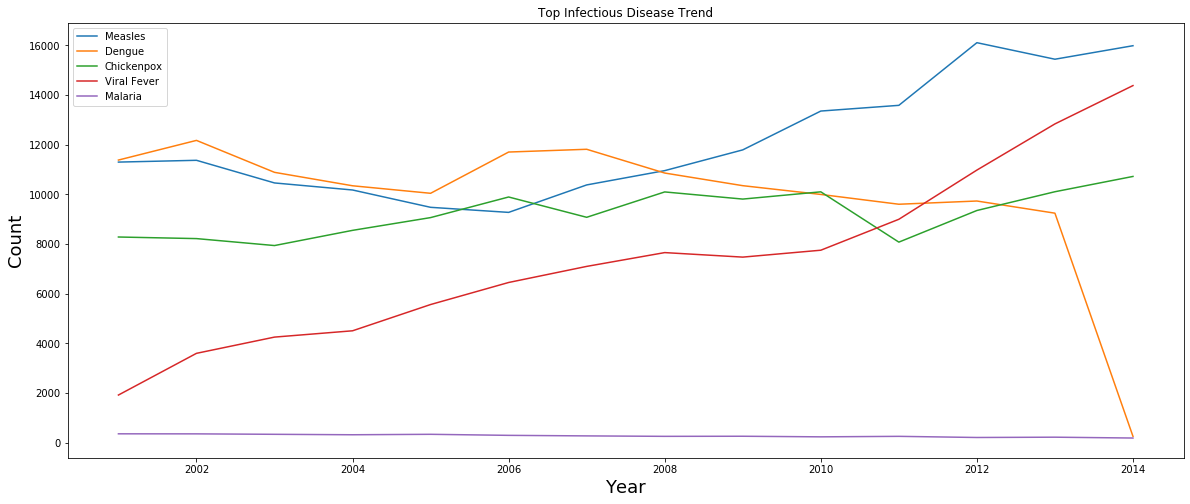

In [4]:
# Let us visualize the data for some of the diseases from the previous result

plt.figure(figsize=(20,8))
plt.title('Top Infectious Disease Trend')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.plot(disease_data[['Measles', 'Dengue', 'Chickenpox', 'Viral Fever', 'Malaria']])
plt.legend(['Measles', 'Dengue', 'Chickenpox', 'Viral Fever', 'Malaria'], loc='upper left')
plt.show()

In [5]:
""" Question 2: What is the current Density of Diseases in each location per year ?
    
Let us first generalize to get each Disease count per year across the locations
    
"""

location_list = df.State.unique() # To get the complete list of locations in our dataset
yr_list = df.Year.unique() # To get the list of years in our dataset

disease_density_data = {}

for location in location_list:
    yr_data = {}
    population_data = {}
    for yr in yr_list:
        qry = pd.DataFrame(df.query("State == @location and Sex == 'Total' and Year == @yr"))
        
        temp_total = qry.groupby(['Disease'])['Count'].sum().sum()
        """ Here twice summation is done. 
        First summation gives the total count for each disease.
        Second summation gives the total count for all the disease at a particular location
        """
        
        population_year = qry.Population.unique()[0] # Total Population
        yr_data[yr] = temp_total/population_year
        
    disease_density_data[location] = yr_data

# Converting dictionary to dataframe
disease_density_data = pd.DataFrame(disease_density_data)
disease_density_data

,Chandigarh,Andaman & Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra & Nagar Haveli,Daman & Diu,Delhi,...,Uttar Pradesh,Uttarakhand,West Bengal,Arunachal Pradesh,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland
2001,0.004544,0.011056,10.533549,0.000755,0.017892,0.013228,0.069750,0.003892,0.001277,0.040314,...,0.003102,0.005224,0.002377,0.009938,0.001389,0.005137,0.001482,0.002280,0.002456,0.003614
2002,0.004848,0.011529,11.790865,0.001040,0.019798,0.016904,0.069311,0.003894,0.001412,0.041433,...,0.003177,0.005555,0.002826,0.010405,0.001292,0.005554,0.001395,0.002589,0.003419,0.004240
2003,0.004917,0.011809,11.592474,0.001278,0.020805,0.018270,0.073254,0.003842,0.001328,0.042971,...,0.003099,0.005985,0.003210,0.009701,0.001419,0.006022,0.001435,0.002613,0.003477,0.004722
2004,0.005208,0.012582,12.154818,0.001319,0.023566,0.018919,0.072731,0.004249,0.001490,0.049247,...,0.002901,0.006954,0.003907,0.010334,0.001997,0.006551,0.002466,0.002707,0.003366,0.004674
2005,0.005518,0.013343,13.514901,0.002041,0.023617,0.024166,0.076052,0.004412,0.001307,0.046783,...,0.003302,0.007587,0.003626,0.010974,0.001668,0.006606,0.002143,0.002778,0.003902,0.004682
2006,0.005682,0.014268,13.690040,0.002529,0.026270,0.023766,0.075193,0.004556,0.001026,0.050720,...,0.003545,0.007833,0.003589,0.011067,0.001302,0.006691,0.001750,0.002385,0.003852,0.003742
2007,0.005705,0.014855,14.044872,0.002442,0.028524,0.021364,0.075524,0.005015,0.001475,0.048212,...,0.004058,0.007765,0.004000,0.010025,0.001596,0.006022,0.001764,0.003118,0.003562,0.003560
2008,0.005681,0.014192,15.552152,0.002351,0.025421,0.022165,0.076563,0.005084,0.002030,0.045135,...,0.003780,0.006920,0.003743,0.010301,0.001165,0.006126,0.001320,0.003320,0.003674,0.003780
2009,0.005561,0.013110,15.894068,0.002876,0.025277,0.022892,0.079925,0.004634,0.002626,0.043344,...,0.003757,0.007250,0.003304,0.010047,0.001234,0.005322,0.001773,0.003625,0.003620,0.003538
2010,0.006102,0.014424,18.091144,0.002641,0.028376,0.034231,0.089420,0.005398,0.002487,0.047594,...,0.004282,0.007973,0.004175,0.011049,0.001386,0.005428,0.002865,0.004018,0.003765,0.003511


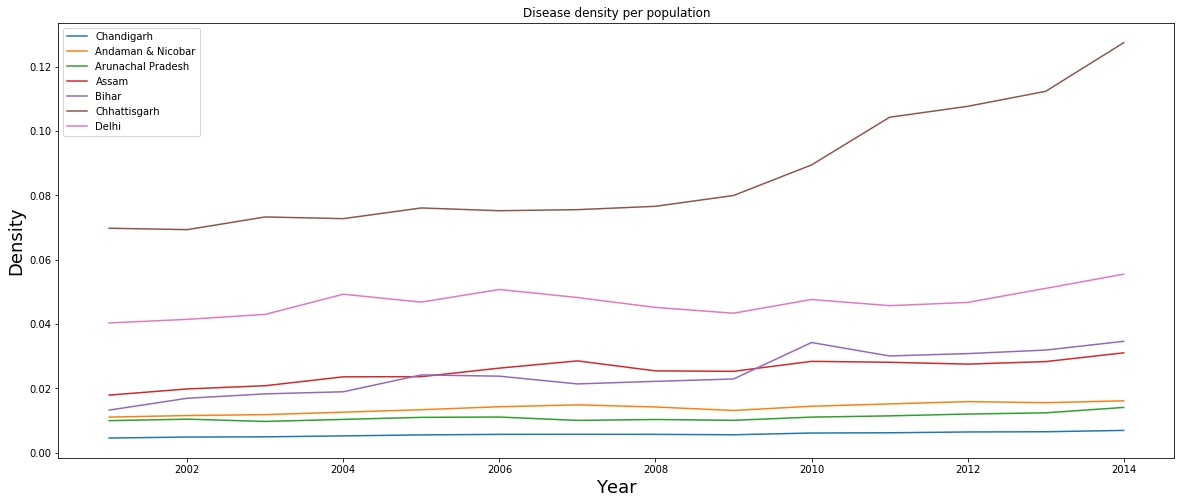

In [6]:
# Let us visualize the data for some of the density of disease from the previous result
plt.figure(figsize=(20,8))
plt.title('Disease density per population')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.plot(disease_density_data[['Chandigarh','Andaman & Nicobar','Arunachal Pradesh','Assam','Bihar','Chhattisgarh', 'Delhi']])
# plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Chandigarh','Andaman & Nicobar','Arunachal Pradesh','Assam','Bihar','Chhattisgarh', 'Delhi'], loc='upper left')
plt.show()

In [7]:
""" Question 3: What is the current total Disease Count per location ?
    
Let us first generalize to get Disease per location data
    
"""

disease_per_location_data = {}

for location in location_list:
    qry = pd.DataFrame(df.query("Sex == 'Total' and State == @location")).groupby('Disease')['Count'].sum()
    disease_per_location_data[location] = qry

# Converting dictionary to dataframe
disease_per_location_data = pd.DataFrame(disease_per_location_data)
disease_per_location_data

,Chandigarh,Andaman & Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Dadra & Nagar Haveli,Daman & Diu,Delhi,...,Uttar Pradesh,Uttarakhand,West Bengal,Arunachal Pradesh,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland
Malaria,40689.0,743.0,1316.0,20.0,626.0,1265.0,264.0,280.0,0.0,281.0,...,691.0,250.0,16.0,66.0,1.0,2079.0,29.0,649.0,30.0,5.0
Rubella,2184.0,131.0,243.0,0.0,24.0,8.0,29.0,56.0,0.0,68.0,...,100.0,64.0,2.0,26.0,0.0,4.0,1.0,50.0,7.0,0.0
Acute Diarrheal Disease,2014166.0,205321.0,183626.0,762.0,54049.0,9819.0,19027.0,47087.0,496.0,78516.0,...,86335.0,99178.0,2091.0,58752.0,183.0,25320.0,1124.0,27351.0,7315.0,2928.0
Acute Encephalitis Syndrome,5621.0,245.0,646.0,0.0,87.0,9.0,74.0,89.0,0.0,294.0,...,86.0,71.0,5.0,1388.0,1.0,21.0,2.0,63.0,19.0,7.0
Acute Flaccid Paralysis,33.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0
Alcohol Poisoning,1024.0,138.0,47.0,3.0,5.0,12.0,6.0,33.0,0.0,29.0,...,21.0,60.0,2.0,45.0,0.0,53.0,27.0,0.0,4.0,1.0
Anthrax,2452.0,190.0,195.0,4.0,100.0,20.0,40.0,82.0,2.0,106.0,...,51.0,119.0,3.0,131.0,1.0,32.0,11.0,37.0,20.0,4.0
Brucellosis,367.0,26.0,48.0,0.0,14.0,3.0,11.0,5.0,0.0,12.0,...,13.0,7.0,0.0,4.0,0.0,5.0,0.0,16.0,12.0,0.0
Castor Seed Poisoning,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Chandipura Viral Encephalitis,257.0,49.0,9.0,0.0,4.0,0.0,5.0,4.0,0.0,14.0,...,19.0,23.0,0.0,11.0,0.0,0.0,0.0,24.0,3.0,0.0


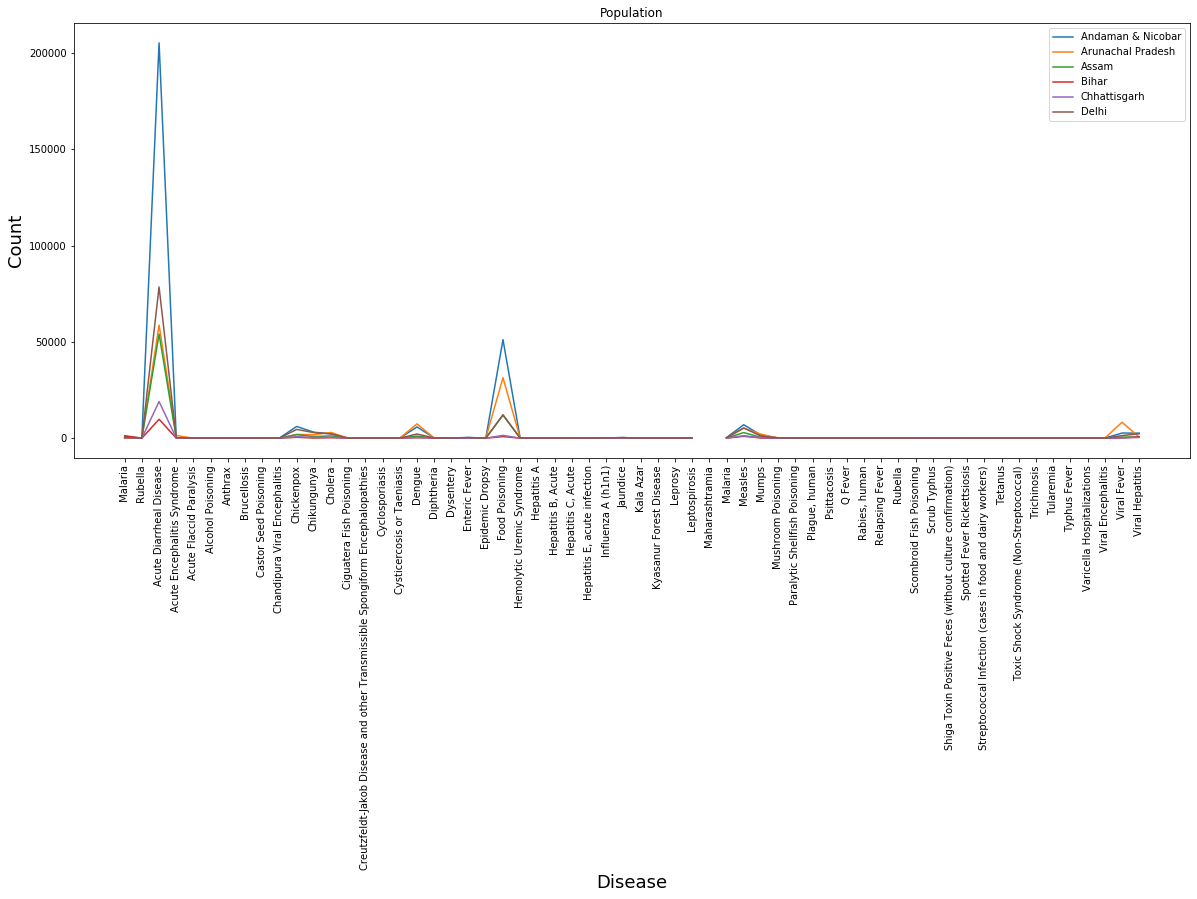

In [8]:
# Let us visualize the data for some of the location from previous result

plt.figure(figsize=(20,8))
plt.title('Population')
plt.xlabel('Disease', fontsize=18)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=18)
plt.plot(disease_per_location_data[['Andaman & Nicobar','Arunachal Pradesh','Assam','Bihar','Chhattisgarh', 'Delhi']])
plt.legend(['Andaman & Nicobar','Arunachal Pradesh','Assam','Bihar','Chhattisgarh', 'Delhi'], loc='upper right')
plt.show()

In [9]:
""" Let us use Machine Learning to predict the future values.
I have used Linear-Regression analysis for the statistical purpose.

For our purpose, I am using this model to predict the future values of “Acute Diarrhoeal Disease” in “Andaman & Nicobar”. 
I have taken “Year” and “Population” as independent variable and “Count” as dependent variable.

"""


dataset = pd.DataFrame(df.query("Disease == 'Acute Diarrheal Disease' and Sex == 'Total' and State == 'Andaman & Nicobar'"))[['Year', 'Population', 'Count']]
dataset = dataset.head(14)
dataset

,Year,Population,Count
19916,2001,1466038,4861
19919,2002,1468943,4870
19922,2003,1467663,4928
19925,2004,1466017,5249
19928,2005,1460358,5205
19931,2006,1465322,6029
19934,2007,1476892,7087
19937,2008,1492275,6974
19940,2009,1504325,6784
19943,2010,1513734,7029


In [10]:
""" Note: I will not be splitting the values in train and test set. 
The reason behind this is the small range of dataset [2001-2014] for splitting them
Instead, I have used the average population growth rate for the next 3 years to predict the values of disease count.
"""

X = dataset[['Year','Population']]
y = dataset['Count']

lm_model = LinearRegression(normalize = True)
lm_model.fit(X,y)
y_pred_linear = lm_model.predict(X)

test_score = r2_score(y_pred_linear, y)
test_score

0.7218890949115363

In [11]:
dataset['Pred_linear'] = y_pred_linear
dataset

,Year,Population,Count,Pred_linear
19916,2001,1466038,4861,4541.636998
19919,2002,1468943,4870,4823.827277
19922,2003,1467663,4928,5178.755088
19925,2004,1466017,5249,5540.044173
19928,2005,1460358,5205,5971.081338
19931,2006,1465322,6029,6217.485100
19934,2007,1476892,7087,6349.073061
19937,2008,1492275,6974,6414.389050
19940,2009,1504325,6784,6537.634355
19943,2010,1513734,7029,6706.781647


In [12]:
""" Here I have calculated the average population growth rate.
Followed by preparing the test_dataset using this rate for next 3 year i.e., 2014-2016
"""



mean_array = []
arr = dataset['Population'].values
for i in range(len(arr)):
    if(i!=0):
        mean_array.append((arr[i]-arr[i-1])/arr[i-1])

population_growth = np.mean(mean_array) # Came out to be 0.8446%
last_population_value = dataset['Population'].values[-1]

test_dataset = {}
# Preparing test dataset
for i in range(2014,2017):
    if(i == 2014):
        test_dataset[i] = last_population_value
    else:
        test_dataset[i] = math.ceil(last_population_value*(1+population_growth))
        last_population_value = test_dataset[i]

test_dataset = pd.DataFrame(test_dataset.items(), columns=['Year', 'Population'])

y_prediction = lm_model.predict(test_dataset)
print('Prediction Values for new dataset:', y_prediction)
test_dataset

Prediction Values for new dataset: [6807.43209537 6974.56324635 7140.70370695]


,Year,Population
0,2014,1584507
1,2015,1594032
2,2016,1603614


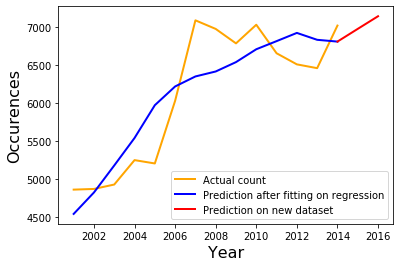

In [13]:
""" After fitting the variables on the model and predicting the values on the same variables,
let us visualize the performance of linear-regression model
"""

# Plot outputs
plt.plot(dataset['Year'].values, dataset['Count'].values,  color='orange', linewidth=2) #Actual Values
plt.plot(dataset['Year'].values, dataset['Pred_linear'].values, color='blue', linewidth=2) #Predicted values after fitting the regression
plt.plot(test_dataset['Year'].values, y_prediction, color='red', linewidth=2) #Predicted values on new year values
plt.xlabel('Year', fontsize=16)
plt.ylabel('Occurences', fontsize=16)
plt.legend(['Actual count', 'Prediction after fitting on regression', 'Prediction on new dataset'], loc='lower right')
plt.show()